In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ssl_df = pd.read_csv('data/Strategic_Subject_List.csv')
ssl_df.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SSL_SCORE,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,SEX_CODE_CD,...,RAW_HEAT_SCORE,STATUS_I,PRE_RAW_HEAT_SCORE,TRAP_FLAGS,SSL_FLAGS,LATITUDE,LONGITUDE,CENSUS_TRACT,COMMUNITY_AREA,LOCATION
0,500,20-30,0,1,4,1,1,1.0,1,M,...,0.14196,Y,14196,NaN,24.0,NaN,NaN,NaN,,NaN
1,500,20-30,0,9,1,1,0,1.0,0,M,...,0.14511,Y,14511,NaN,8.0,NaN,NaN,NaN,,NaN
2,500,less than 20,1,2,1,1,3,1.0,0,M,...,0.12982,Y,12982,NaN,8.0,NaN,NaN,NaN,,NaN
3,500,less than 20,1,1,4,1,0,1.6,1,M,...,0.13110,Y,13110,NaN,NaN,NaN,NaN,NaN,,NaN
4,500,less than 20,0,0,5,0,0,1.3,3,M,...,0.12874,Y,12874,NaN,NaN,NaN,NaN,NaN,,NaN


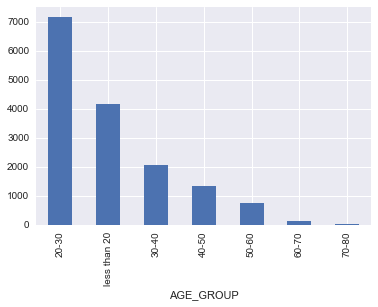

In [3]:
victim_violence_df = ssl_df.loc[(ssl_df['PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS'] > 0) |
                                (ssl_df['PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT'] > 0)].copy()
victim_age_grp = victim_violence_df.groupby('AGE_GROUP')['SSL_SCORE'].count()
victim_age_grp.sort_values(ascending=False, inplace=True)
victim_age_grp.plot(kind='bar')

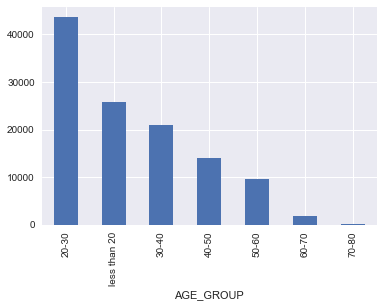

In [4]:
arr_violence_df = ssl_df.loc[(ssl_df['PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES'] > 0) | 
                             (ssl_df['PREDICTOR_RAT_NARCOTIC_ARRESTS'] > 0) | 
                             (ssl_df['PREDICTOR_RAT_UUW_ARRESTS'] > 0)].copy()
violence_age_grp = arr_violence_df.groupby('AGE_GROUP')['SSL_SCORE'].count()
violence_age_grp.sort_values(ascending=False, inplace=True)
violence_age_grp.plot(kind='bar')

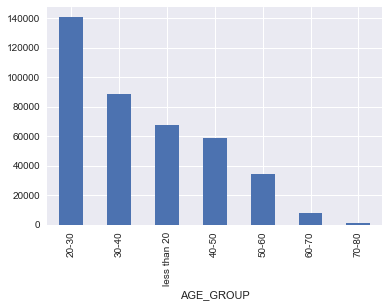

In [5]:
ssl_age_grp = ssl_df.groupby('AGE_GROUP')['SSL_SCORE'].count()
ssl_age_grp.sort_values(ascending=False, inplace=True)
ssl_age_grp.plot(kind='bar')